In [312]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# plt.scatter(X[:,0],X[:,1],c = 'red',marker= 'o',s = 50)
sns.pairplot(X)
plt.show()

NameError: name 'X' is not defined

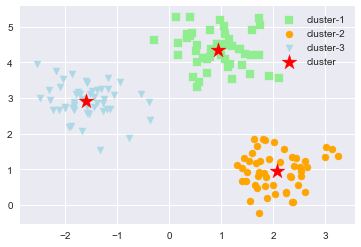

In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
km.fit(X)
y_km = km.predict(X)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0].iloc[:,0],X[y_km == 0].iloc[:,1],s = 50, c= 'lightgreen',marker= 's',label = 'cluster-1')
plt.scatter(X[y_km == 1].iloc[:,0],X[y_km == 1].iloc[:,1],s = 50, c= 'orange',marker= 'o',label = 'cluster-2')
plt.scatter(X[y_km == 2].iloc[:,0],X[y_km == 2].iloc[:,1],s = 50, c= 'lightblue',marker= 'v',label = 'cluster-3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 250, c= 'red',marker= '*',label = 'cluster')
plt.legend()
# plt.grid()
plt.show()

In [314]:
import pandas as pd
import numpy as np
df = pd.read_excel('聚类数据.xlsx')
df.iloc[:,0] = df.iloc[:,0]/df.iloc[:,1]
df.head()
df[1:5]

,金额,笔数
1,4549.200000,1
2,3214.285714,14
3,17013.562500,8
4,33326.666667,3


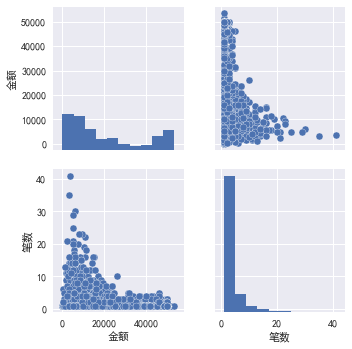

In [315]:
sns.pairplot(df)
plt.show()

In [316]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabaz_score
x = df.values
step1 = ('st',MinMaxScaler())
step2 = ('km',KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0))
step3 = ('ac',AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete'))
step4 = ('db',DBSCAN(eps=0.1,min_samples=100,metric='euclidean'))
step5 = ('sc',SpectralClustering(n_clusters=4,gamma=0.01))
pipe = Pipeline(steps=[step1,step2])
pipe.fit(x)
y = pipe.fit_predict(x)
cluster = pipe.named_steps['km'].cluster_centers_
x1 = MinMaxScaler().fit_transform(x)


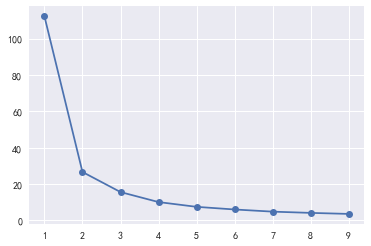

In [317]:
'''肘方法—确定聚类方法的最佳分组数量'''
'''参数clf为模型，参数x为预处理后的数据'''
def clusnum(clf,x,k):
    a = []
    for i in range(1,k):
        clf.set_params(n_clusters=i)
        clf.fit(x)
        a.append(clf.inertia_)
    plt.plot(range(1,k),a,marker = 'o')
clf = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
clusnum(clf,x1,10)

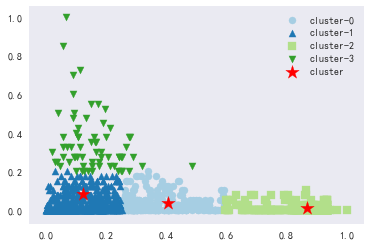

In [305]:
'''聚类画图，仅适用于两个特征的模型'''
from matplotlib.cm import Paired
colorlist = ['o','^','s','v']
for i in np.unique(y):
    plt.scatter(x1[y == i ,0],x1[y == i,1],s = 50, c= Paired.colors[i],marker= colorlist[i],label = 'cluster-{0}'.format(i))
plt.scatter(cluster[:,0],cluster[:,1],s = 200, c= 'red',marker= '*',label = 'cluster')#此处仅对kmeans聚类有效
plt.legend()
plt.grid()
plt.show()

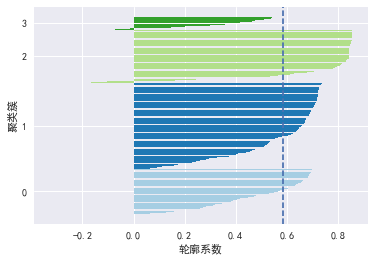

In [311]:
'''轮廓系数图'''
from matplotlib.cm import Paired 
showcn()
ssa = silhouette_samples(x1,y,metric='euclidean')
y_min,y_max = 0,0
y_mean = []
for i in np.unique(y):
    y_max += len(ssa[y==i])
    plt.barh(range(y_min,y_max),np.sort(ssa[y==i]),color=Paired.colors[i])
    y_mean.append((y_min+y_max)/2)
    y_min += len(s1[y==i])
plt.yticks(y_mean,np.unique(y))
ssc = silhouette_score(x1,y,metric='euclidean')
plt.axvline(ssc,linestyle = '--')
plt.xlabel('轮廓系数')
plt.ylabel('聚类簇')
plt.savefig('12.png')
plt.show()

In [321]:
'''平均轮廓系数'''
silhouette_score(x1,y,metric='euclidean')
'''聚类得分'''
calinski_harabaz_score(x1,y)

3143.7168604415592

In [254]:
'''画图中文显示设置'''
def showcn():
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

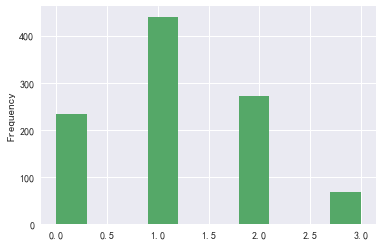

In [309]:
aa=pd.Series(y)
aa.plot(kind = 'hist')
plt.hist(y)
plt.show()